In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)


4.10.0


# Task 1: Gray-scaling and Color Channel Separation in OpenCV

A colored image consists of 3 color channels (Red, Green, Blue), while a grayscale image consists of only 1 channel that carries intensity information for each pixel, making it appear black-and-white.
---
### **Task:**
In this  task you have to convert the image into Gray Scaling  and separate the 3 color from image i.e red green and blue. Implement color channel separation and visualization with the following steps:

1. **Convert the Image to Grayscale**:
   - Convert a colored image into grayscale using OpenCV.

2. **Separate Color Channels**:
   - Split the image into its **red**, **green**, and **blue** color channels using OpenCV.

3. **Visualize Each Color Channel**:
   - Create a plot with **three subplots** arranged horizontally using Matplotlib.
   - Display each color channel in **RGB** format within its respective subplot.

4. **Add Titles to Each Plot**:
   - Label each subplot with its corresponding color channel (Red, Green, Blue).

---


Task 1


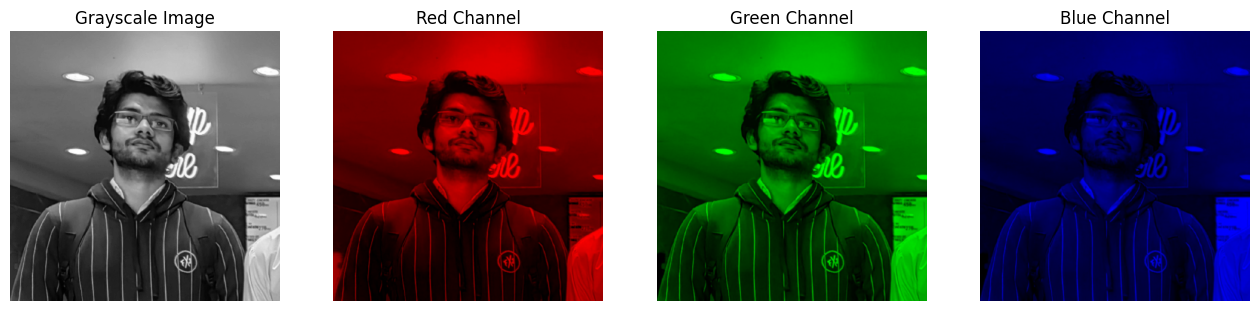

In [6]:
print("Task 1")

# Step 1: Read the image
image = cv2.imread('me.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Separate the color channels (OpenCV uses BGR order)
blue_channel, green_channel, red_channel = cv2.split(image)

# Step 4: Create a figure to visualize the channels
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# Step 5: Display the grayscale image
axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Grayscale Image')
axs[0].axis('off')

# Step 6: Display the Red, Green, and Blue channels
# Red channel visualization
red_image = np.zeros_like(image)
red_image[:, :, 2] = red_channel  # Set red channel
axs[1].imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Red Channel')
axs[1].axis('off')

# Green channel visualization
green_image = np.zeros_like(image)
green_image[:, :, 1] = green_channel  # Set green channel
axs[2].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Green Channel')
axs[2].axis('off')

# Blue channel visualization
blue_image = np.zeros_like(image)
blue_image[:, :, 0] = blue_channel  # Set blue channel
axs[3].imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
axs[3].set_title('Blue Channel')
axs[3].axis('off')

# Show the plot
plt.show()


# Task 2: Image Translation
### **Image Translation refers to shifting an image along the x and y axes. This operation can be useful for tasks like object detection, data augmentation, or repositioning image elements.**

In OpenCV, you can translate an image using the `cv2.warpAffine()` function and a translation matrix.
Implement image translation using OpenCV with the following steps:
- **Define the Translation Matrix:** Create a translation matrix to shift the image by `100` pixels along the `x-axis` and `50` pixels along the `y-axis`.

- **Get Image Dimensions:** Extract the number of rows and columns from the image.
Apply the Translation: Use` cv2.warpAffine` to apply the translation matrix to the image.
Convert the Image for Display: Convert the translated image from BGR to RGB format.

- **Display the Translated Image:** Use matplotlib to display the translated image without axis labels.

Task 2


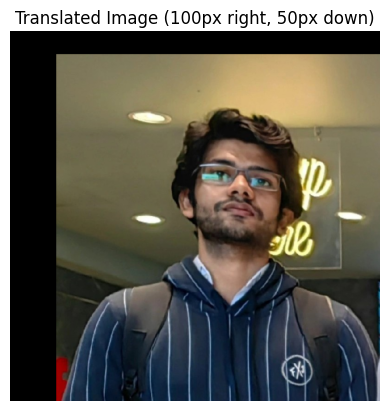

In [7]:
print("Task 2")
# Step 1: Load the image
image = cv2.imread('me.jpg')

# Step 2: Get image dimensions
rows, cols = image.shape[:2]

# Step 3: Define the translation matrix
# 100 pixels to the right (x-axis) and 50 pixels down (y-axis)
translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])

# Step 4: Apply the translation using cv2.warpAffine
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# Step 5: Convert BGR to RGB for displaying with Matplotlib
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)

# Step 6: Display the translated image using Matplotlib
plt.imshow(translated_image_rgb)
plt.title('Translated Image (100px right, 50px down)')
plt.axis('off')  # Remove axis labels
plt.show()

#Task 3: Image Rotation using OpenCV

**Image Rotation** refers to rotating an image by a certain angle around a specific center point, often the image's center. OpenCV provides the `cv2.warpAffine()` function combined with a rotation matrix to achieve this.

---

### **Steps to Implement Image Rotation:**

- **Obtain the Image Dimensions**:
  - Extract the **height** and **width** of the image.

- **Define the Rotation Center**:
  - Set the center of the image around which the rotation will occur (often the center).

- **Copy the Image Four Times**:
  - Create four copies of the original image.
  - Rotate each image by **90**, **180**, **270**, and **360 degrees**.

- **Specify the Rotation Angle**:
  - Rotate the image counter-clockwise by the required degrees.
  
- **Get the Rotation Matrix**:
  - Use `cv2.getRotationMatrix2D()` to compute the matrix needed for the rotation.

- **Perform the Rotation**:
  - Apply the rotation matrix to the image using `cv2.warpAffine()`.

- **Convert the Image for Display**:
  - Convert the rotated image from **BGR to RGB** format.

- **Display the Rotated Image**:
  - Use **matplotlib** to display the rotated images without axis labels.

---





Task 3


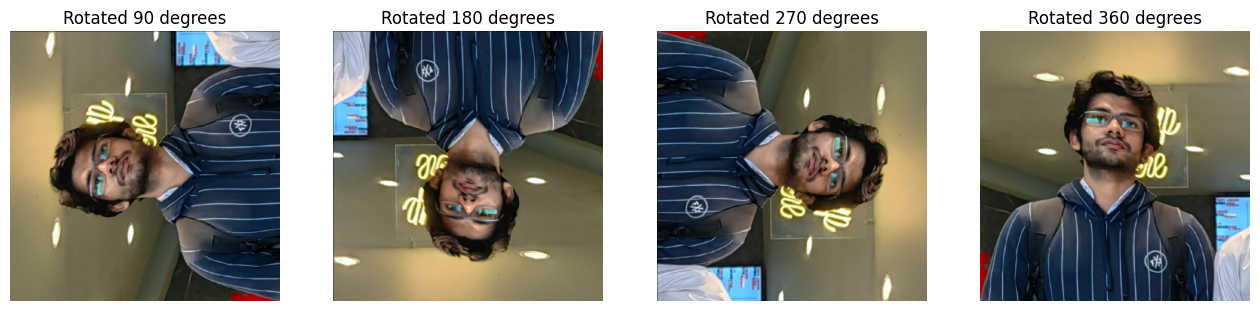

In [8]:
print("Task 3")
# Step 1: Load the image
image = cv2.imread('me.jpg')

# Step 2: Get image dimensions (height and width)
height, width = image.shape[:2]

# Step 3: Define the center of the image for rotation
center = (width // 2, height // 2)

# Step 4: Create four copies of the image to apply different rotations
rotations = [90, 180, 270, 360]

# Step 5: Create a plot to display all four rotated images
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

for i, angle in enumerate(rotations):
    # Step 6: Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)  # scale=1 for no resizing
    
    # Step 7: Perform the rotation using cv2.warpAffine
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    # Step 8: Convert the rotated image from BGR to RGB for Matplotlib display
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    
    # Step 9: Display the rotated image using Matplotlib
    axs[i].imshow(rotated_image_rgb)
    axs[i].set_title(f'Rotated {angle} degrees')
    axs[i].axis('off')  # Remove axis labels

# Show the plot
plt.show()

# Task 4: Scaling and Resizing using OpenCV

**Scaling and Resizing** are important operations in image processing. They involve changing the dimensions (size) of an image while maintaining its visual content. OpenCV provides the `cv2.resize()` function to scale and resize images.

---

### **Lab Instructions:**

Your task is to perform image scaling and resizing using **OpenCV** and **Matplotlib**. Follow the steps below to demonstrate different scaling techniques.

---

### **Steps:**

1. **Load an Image**:
   - Use **OpenCV** to load an image.
   - Ensure the image is loaded correctly before proceeding with resizing operations.

2. **Scale the Image**:
   - Scale the image to **15%** of its original size using **linear interpolation**.

3. **Enlarge the Image**:
   - Enlarge the image to **twice its original size** using **cubic interpolation**.

4. **Resize to Specific Dimensions**:
   - Resize the image to specific dimensions of **200x400 pixels** using **area interpolation**.

5. **Visualize the Results**:
   - Use **Matplotlib** to display all three resized images side by side.
   - Ensure each subplot has a title indicating the **interpolation method** used.

---






Task 4


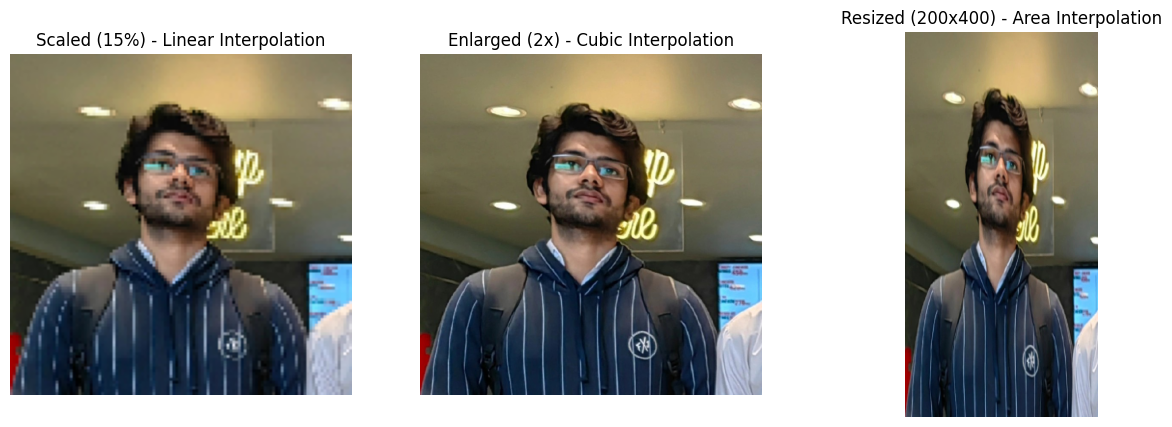

In [9]:
print("Task 4")
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 2: Scale the image to 15% of its original size using linear interpolation
    scale_percent = 15  # 15% of the original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    scaled_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

    # Step 3: Enlarge the image to twice its original size using cubic interpolation
    width = int(image.shape[1] * 2)
    height = int(image.shape[0] * 2)
    dim = (width, height)
    enlarged_image = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

    # Step 4: Resize the image to specific dimensions (200x400) using area interpolation
    dim = (200, 400)
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

    # Step 5: Convert BGR to RGB for displaying with Matplotlib
    scaled_image_rgb = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
    enlarged_image_rgb = cv2.cvtColor(enlarged_image, cv2.COLOR_BGR2RGB)
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Step 6: Visualize the results side by side
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the scaled image
    axs[0].imshow(scaled_image_rgb)
    axs[0].set_title('Scaled (15%) - Linear Interpolation')
    axs[0].axis('off')

    # Plot the enlarged image
    axs[1].imshow(enlarged_image_rgb)
    axs[1].set_title('Enlarged (2x) - Cubic Interpolation')
    axs[1].axis('off')

    # Plot the resized image
    axs[2].imshow(resized_image_rgb)
    axs[2].set_title('Resized (200x400) - Area Interpolation')
    axs[2].axis('off')

    # Show the plot
    plt.show()


# Task 5: Image Blur using OpenCV

In this lab, you will implement a **Gaussian blur** on an image using OpenCV. Follow the steps below to perform the blurring operation.

---

### **Steps:**

1. **Read the Image**:
   - Load the image using **OpenCV**.

2. **Apply Gaussian Blur**:
   - Use OpenCV’s `cv2.GaussianBlur()` function to apply a **Gaussian blur** to the image.
   - Set the **kernel size** to **(15, 15)** to achieve the desired level of blurring.

3. **Display the Blurred Image**:
   - Convert the blurred image from **BGR to RGB** format.
   - Display the blurred image using **matplotlib**.

---


Task 5


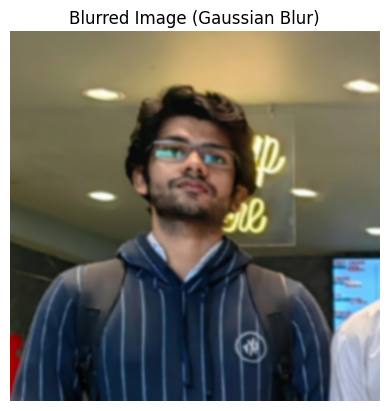

In [10]:
print("Task 5")
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 2: Apply Gaussian blur with a kernel size of (15, 15)
    blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

    # Step 3: Convert the blurred image from BGR to RGB format
    blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

    # Step 4: Display the blurred image using Matplotlib
    plt.imshow(blurred_image_rgb)
    plt.title('Blurred Image (Gaussian Blur)')
    plt.axis('off')  # Hide axis labels for a cleaner display
    plt.show()

# Task 6: Adjust Image Brightness and Contrast in OpenCV

You are given an image and need to adjust its brightness and contrast. Follow the steps below to implement the changes:

---

### **Task:**

1. **Read the Image**:
   - Load the image from a given file path using OpenCV.

2. **Convert the Image to Float32 Format**:
   - Convert the image to `float32` format to ensure precision during calculations.

3. **Define Contrast and Brightness**:
   - Set **contrast control** (`alpha`) to `1.5` and **brightness control** (`beta`) to `50`.

4. **Apply Brightness and Contrast Adjustments**:
   - Use `cv2.convertScaleAbs` to apply the contrast and brightness adjustments.

5. **Convert the Adjusted Image to RGB**:
   - Convert the adjusted image from BGR to RGB format for display using Matplotlib.

6. **Display the Adjusted Image**:
   - Show the image with adjusted brightness and contrast using Matplotlib, ensuring no axis is displayed.

---

Task 6


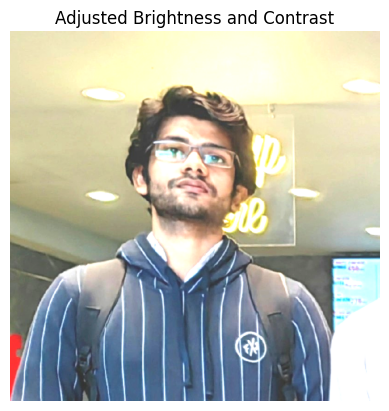

In [11]:
print("Task 6")
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 2: Convert the image to float32 format
    image_float32 = image.astype('float32')

    # Step 3: Set contrast (alpha) and brightness (beta)
    alpha = 1.5  # Contrast control
    beta = 50    # Brightness control

    # Step 4: Apply brightness and contrast adjustments
    adjusted_image = cv2.convertScaleAbs(image_float32, alpha=alpha, beta=beta)

    # Step 5: Convert the adjusted image from BGR to RGB format
    adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)

    # Step 6: Display the adjusted image using Matplotlib
    plt.imshow(adjusted_image_rgb)
    plt.title('Adjusted Brightness and Contrast')
    plt.axis('off')  # Hide axis labels for a cleaner display
    plt.show()



# Task 7  Crop a Specific Region of an Image in OpenCV

You are given an image, and your task is to crop a specific region of it and display the cropped portion. Follow the steps below:

---

### **Task:**

1. **Read the Image**:
   - Load the image into a variable using OpenCV.

2. **Crop the Region**:
   - Crop a specific region of the image using the following coordinates:
     - **startY = 50**, **height = 200**
     - **startX = 50**, **width = 200**
   - The region to crop will be: `(startY:startY+height, startX:startX+width)`.

3. **Convert the Cropped Image to RGB**:
   - Convert the cropped image from BGR to RGB format using `cv2.cvtColor` for proper display in Matplotlib.

4. **Display the Cropped Image**:
   - Display the cropped image using Matplotlib, ensuring that the axis is hidden.

---


Task 7


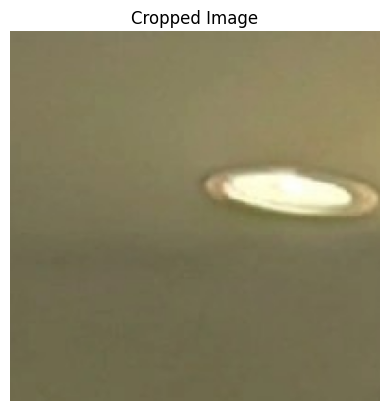

In [13]:
print("Task 7")
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 2: Crop the region (startY=50, height=200, startX=50, width=200)
    startY, height = 50, 200
    startX, width = 50, 200
    cropped_image = image[startY:startY+height, startX:startX+width]

    # Step 3: Convert the cropped image from BGR to RGB format
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

    # Step 4: Display the cropped image using Matplotlib
    plt.imshow(cropped_image_rgb)
    plt.title('Cropped Image')
    plt.axis('off')  # Hide axis labels for a cleaner display
    plt.show()


# Task 8 Draw a Circle on an Image in OpenCV

You are provided with an image, and your task is to draw a circle on it and display the result. Follow the steps below:

---

### **Task:**

1. **Get Image Dimensions**:
   - Load the image and extract its dimensions (height, width) to calculate the center point of the image.

2. **Draw the Circle**:
   - Draw a circle at the center of the image using the following specifications:
     - **Radius**: 50 pixels
     - **Color**: Green `(0, 255, 0)`
     - **Thickness**: 5 pixels

3. **Convert the Image to RGB**:
   - Convert the image from BGR to RGB format using `cv2.cvtColor` for proper display in Matplotlib.

4. **Display the Image**:
   - Display the image with the circle using Matplotlib, and hide the axis.

---

Task 8


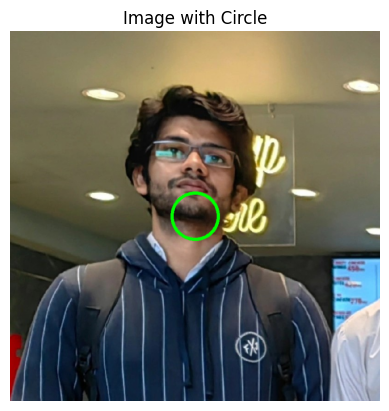

In [14]:
print("Task 8")
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 1: Get image dimensions (height, width)
    height, width = image.shape[:2]

    # Step 2: Calculate the center point of the image
    center_x, center_y = width // 2, height // 2

    # Step 3: Draw a circle at the center with radius 50, green color, and thickness of 5
    circle_image = cv2.circle(image.copy(), (center_x, center_y), 50, (0, 255, 0), 5)

    # Step 4: Convert the image from BGR to RGB format
    circle_image_rgb = cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)

    # Step 5: Display the image with the circle using Matplotlib
    plt.imshow(circle_image_rgb)
    plt.title('Image with Circle')
    plt.axis('off')  # Hide axis labels for a cleaner display
    plt.show()



# Task 9 Apply Canny Edge Detection in OpenCV

Given an image, your goal is to perform edge detection using the Canny algorithm. Follow these steps:

---
### **Task:**

1. **Convert the Image to Grayscale**:
   - Load the image and convert it to grayscale using `cv2.cvtColor` to prepare for edge detection.

2. **Apply Canny Edge Detection**:
   - Use OpenCV's `cv2.Canny()` function with the following threshold values:
     - **Lower threshold**: 100
     - **Upper threshold**: 200

3. **Display the Detected Edges**:
   - Display the resulting edges using Matplotlib with a grayscale colormap, and hide the axis for a cleaner view.

---

Task 9


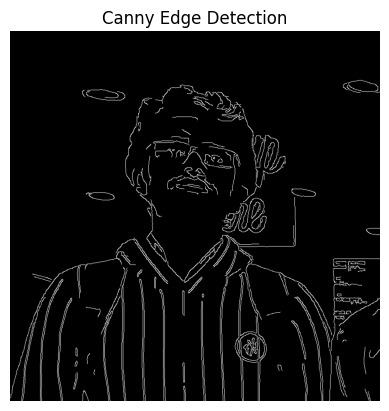

In [15]:
print("Task 9")
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 1: Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply Canny edge detection with thresholds 100 and 200
    edges = cv2.Canny(gray_image, 100, 200)

    # Step 3: Display the detected edges using Matplotlib with a grayscale colormap
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')  # Hide axis labels for a cleaner display
    plt.show()


# Task 10 Image Processing Application for Smart Surveillance System

You are developing a real-world image processing application for a smart surveillance system. This system needs to process images captured by surveillance cameras to enhance visibility, detect objects, and present useful visual information. Your task is to implement a Python script that performs a series of image processing operations to prepare and analyze images effectively.

---

### **Task:**

1. **Enhance Image Brightness and Contrast**:
   - Read the image from the surveillance camera.
   - Adjust brightness and contrast using `cv2.convertScaleAbs()`.

2. **Apply Gaussian Blur**:
   - Use `cv2.GaussianBlur()` to apply blur to the image, reducing noise and improving clarity.

3. **Detect Edges using Canny Edge Detection**:
   - Convert the image to grayscale.
   - Apply Canny edge detection to highlight the edges in the scene.

4. **Highlight Moving Objects**:
   - Compare consecutive frames from the camera to detect motion (optional).

5. **Display the Processed Image**:
   - Use `matplotlib` to display the enhanced, blurred, and edge-detected images side by side.

---



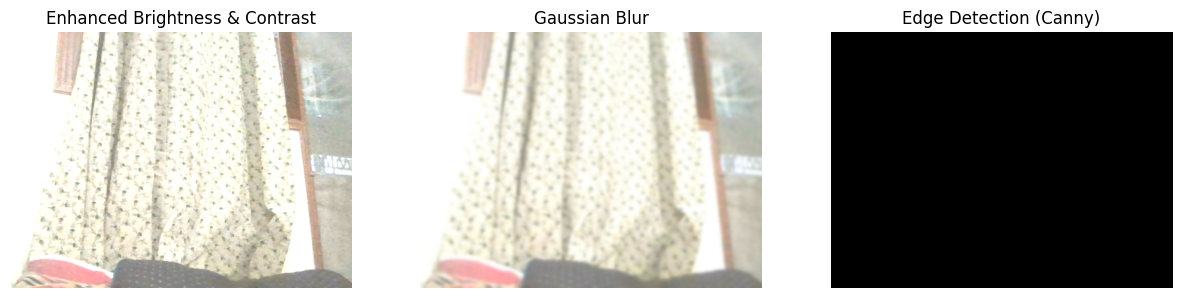

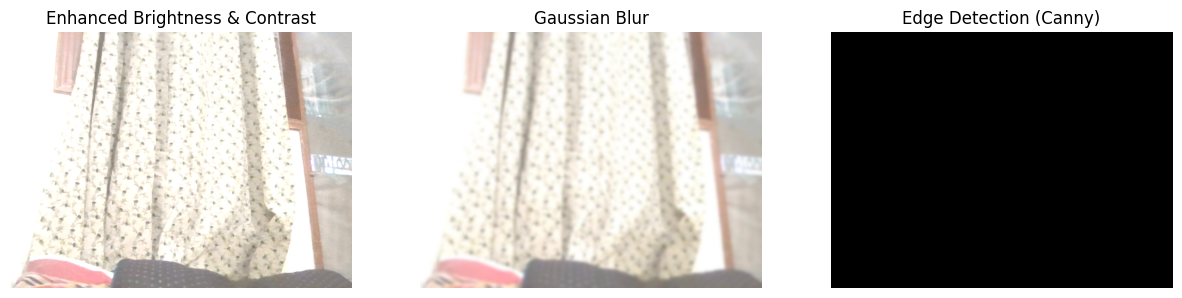

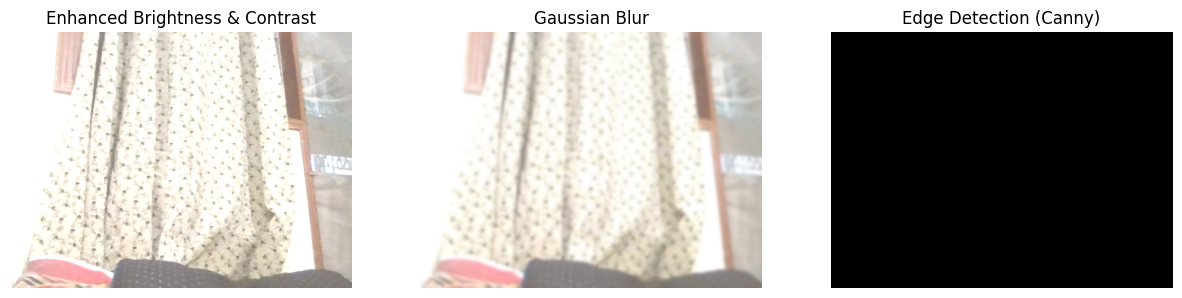

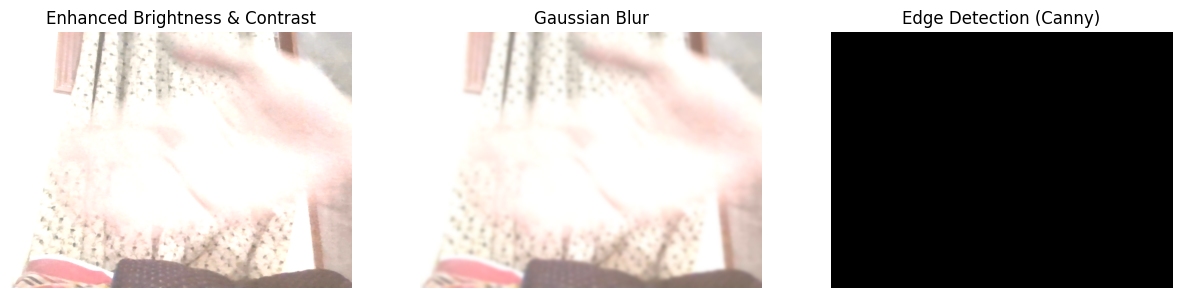

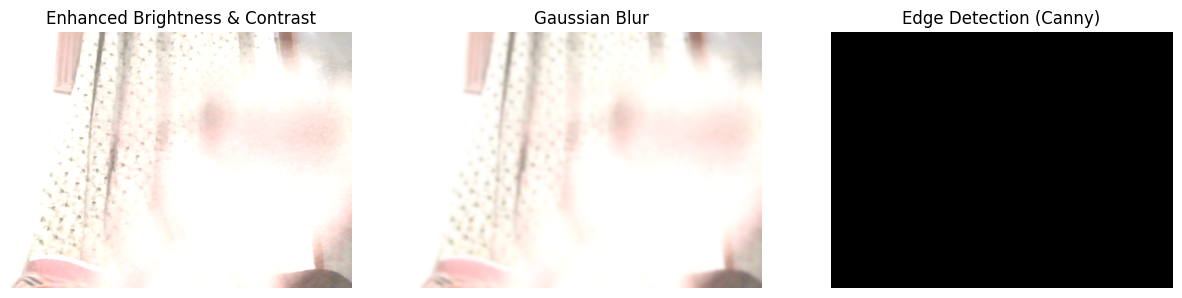

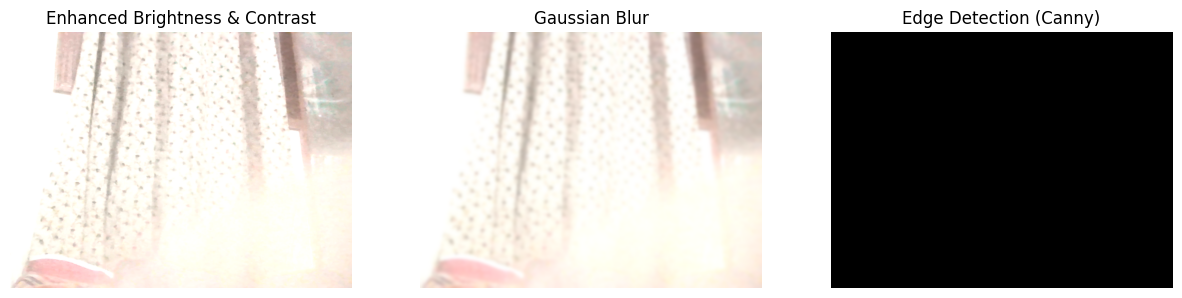

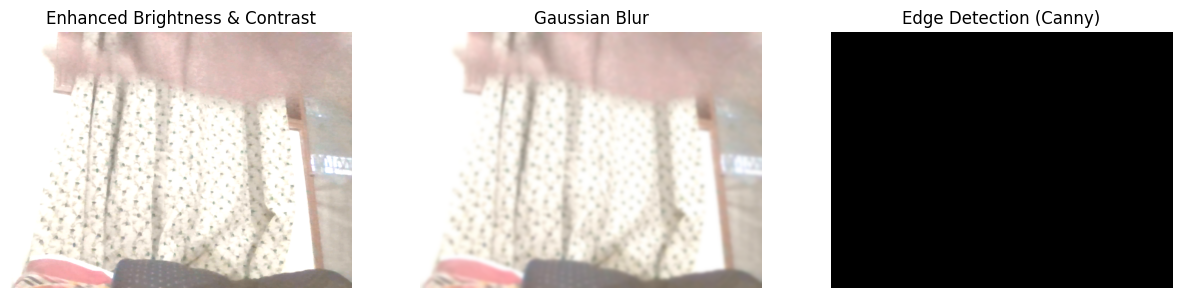

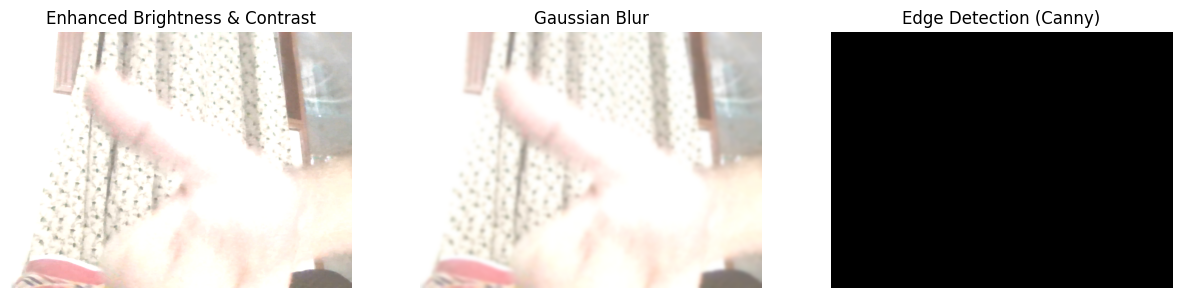

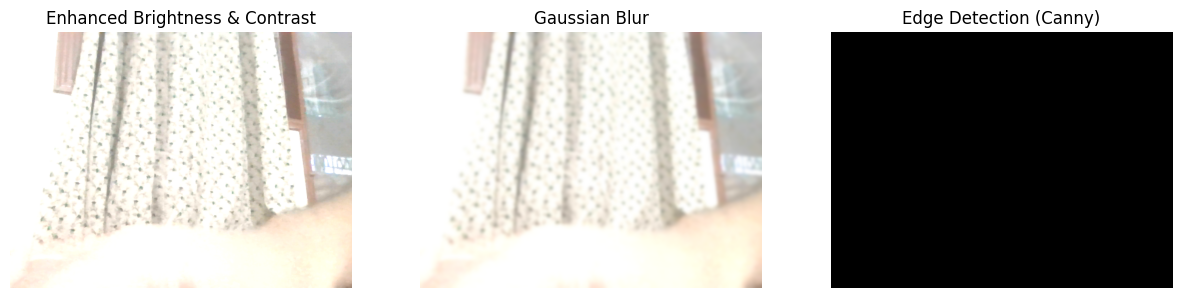

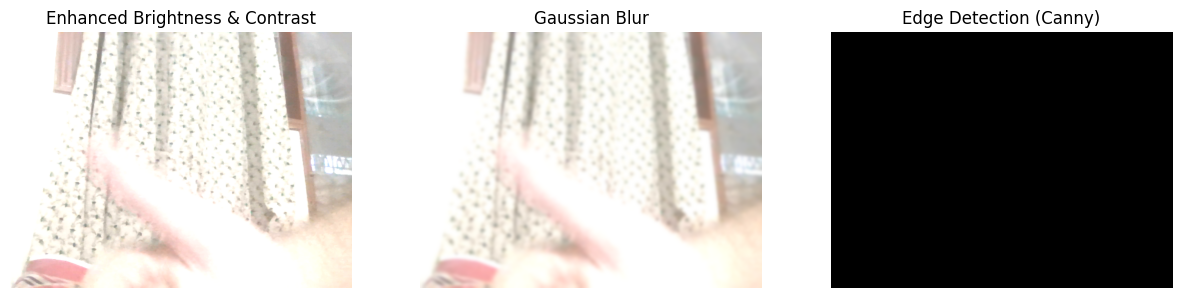

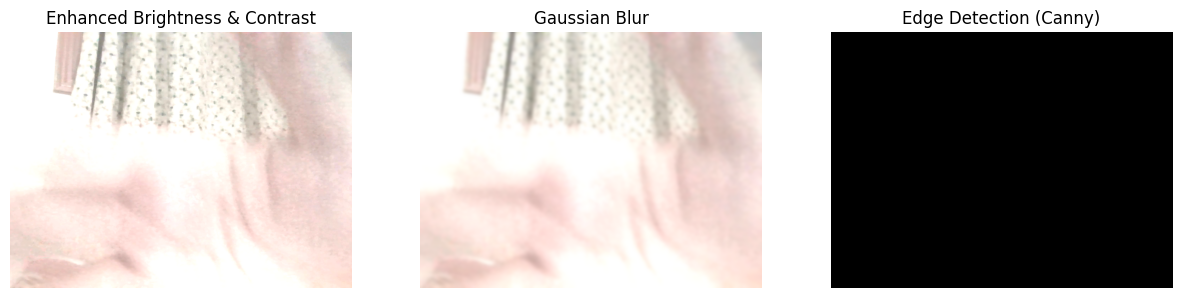

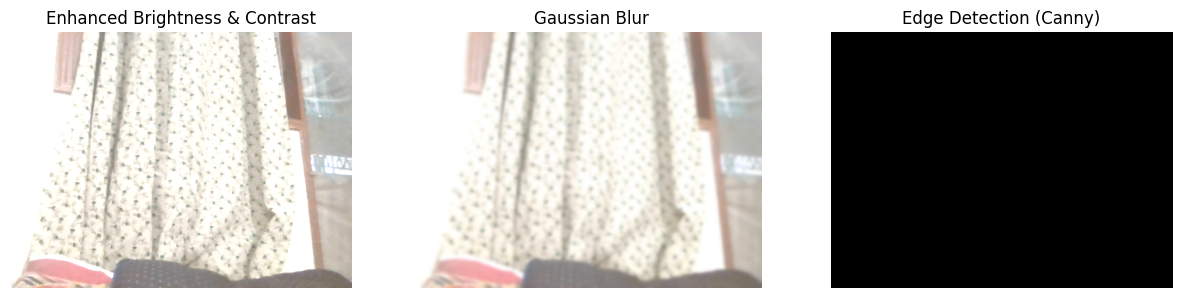

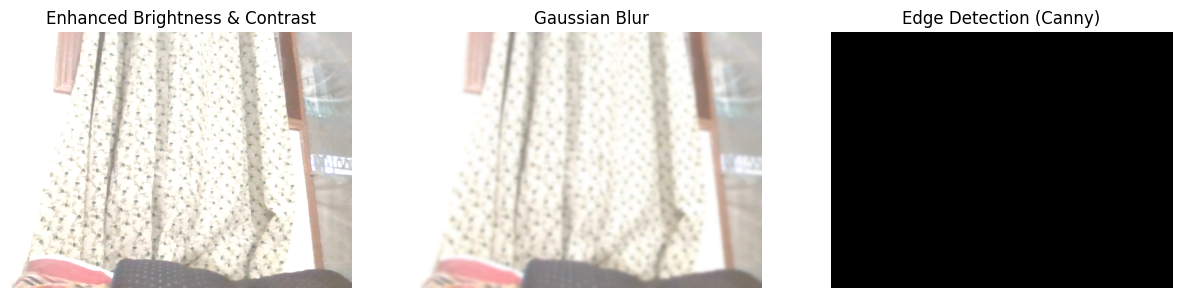

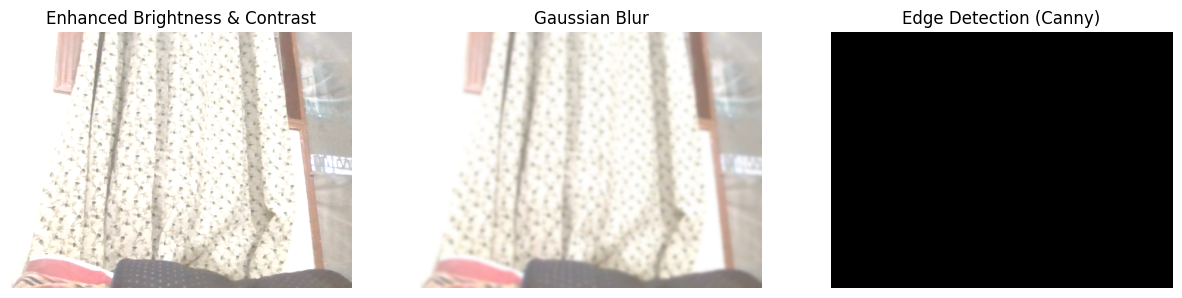

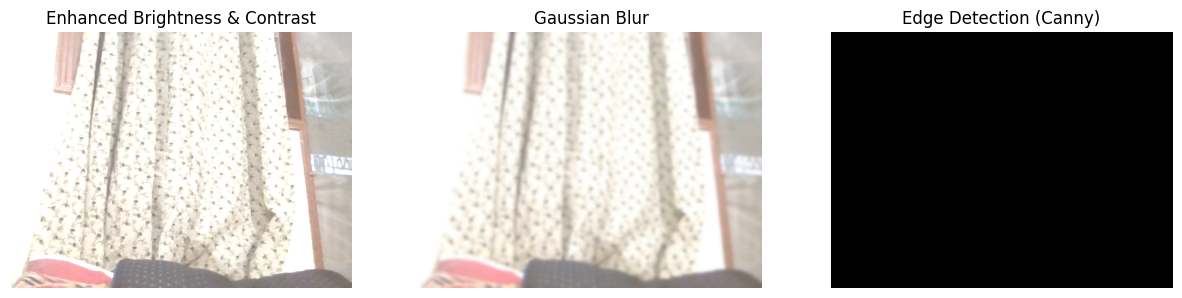

Time limit reached. Closing camera.


In [3]:
import cv2
import matplotlib.pyplot as plt
import time

# Function to enhance brightness and contrast
def enhance_brightness_contrast(image, alpha=1.5, beta=50):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Function to apply Gaussian blur
def apply_gaussian_blur(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, 0)

# Function to detect edges using Canny
def detect_edges(image, lower_threshold=100, upper_threshold=200):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray_image, lower_threshold, upper_threshold)

# Open the camera
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    start_time = time.time()  # Get the start time
    while True:
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture image.")
            break
        
        # Step 1: Enhance brightness and contrast
        enhanced_frame = enhance_brightness_contrast(frame)

        # Step 2: Apply Gaussian blur
        blurred_frame = apply_gaussian_blur(enhanced_frame)

        # Step 3: Detect edges
        edges = detect_edges(blurred_frame)

        # Step 4: Convert images to RGB format for display with Matplotlib
        enhanced_frame_rgb = cv2.cvtColor(enhanced_frame, cv2.COLOR_BGR2RGB)
        blurred_frame_rgb = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2RGB)

        # Step 5: Display the enhanced, blurred, and edge-detected images side by side
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # Display the enhanced frame
        axs[0].imshow(enhanced_frame_rgb)
        axs[0].set_title('Enhanced Brightness & Contrast')
        axs[0].axis('off')

        # Display the blurred frame
        axs[1].imshow(blurred_frame_rgb)
        axs[1].set_title('Gaussian Blur')
        axs[1].axis('off')

        # Display the edge-detected frame
        axs[2].imshow(edges, cmap='gray')
        axs[2].set_title('Edge Detection (Canny)')
        axs[2].axis('off')

        plt.show()

        # Break the loop after 10 seconds
        if time.time() - start_time > 10:
            print("Time limit reached. Closing camera.")
            break

# Release the camera and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


# Task 11 Analyze and Visualize Image Histograms

You are given an image and need to analyze and visualize its histograms. Follow these steps:

---

### **Task:**

1. **Convert the Image to Grayscale**:
   - Use OpenCV to convert the given image to a grayscale image.

2. **Compute the Histograms**:
   - Calculate the histogram for the grayscale image.
   - Calculate histograms for the Blue and Green color channels of the original image.

3. **Set Up the Visualization**:
   - Create a Matplotlib figure with a 2x3 grid of subplots.
   - Plot the grayscale histogram in the top-left subplot.
   - Plot the Blue and Green channel histograms in the top-middle and top-right subplots, respectively.

4. **Display the Original Image**:
   - Display the original image in the bottom-left subplot.

5. **Ensure the Layout**:
   - Ensure that the axis is turned off for all subplot areas except for the histograms.
   - Adjust the layout to make sure everything is displayed correctly.

---

Task 11


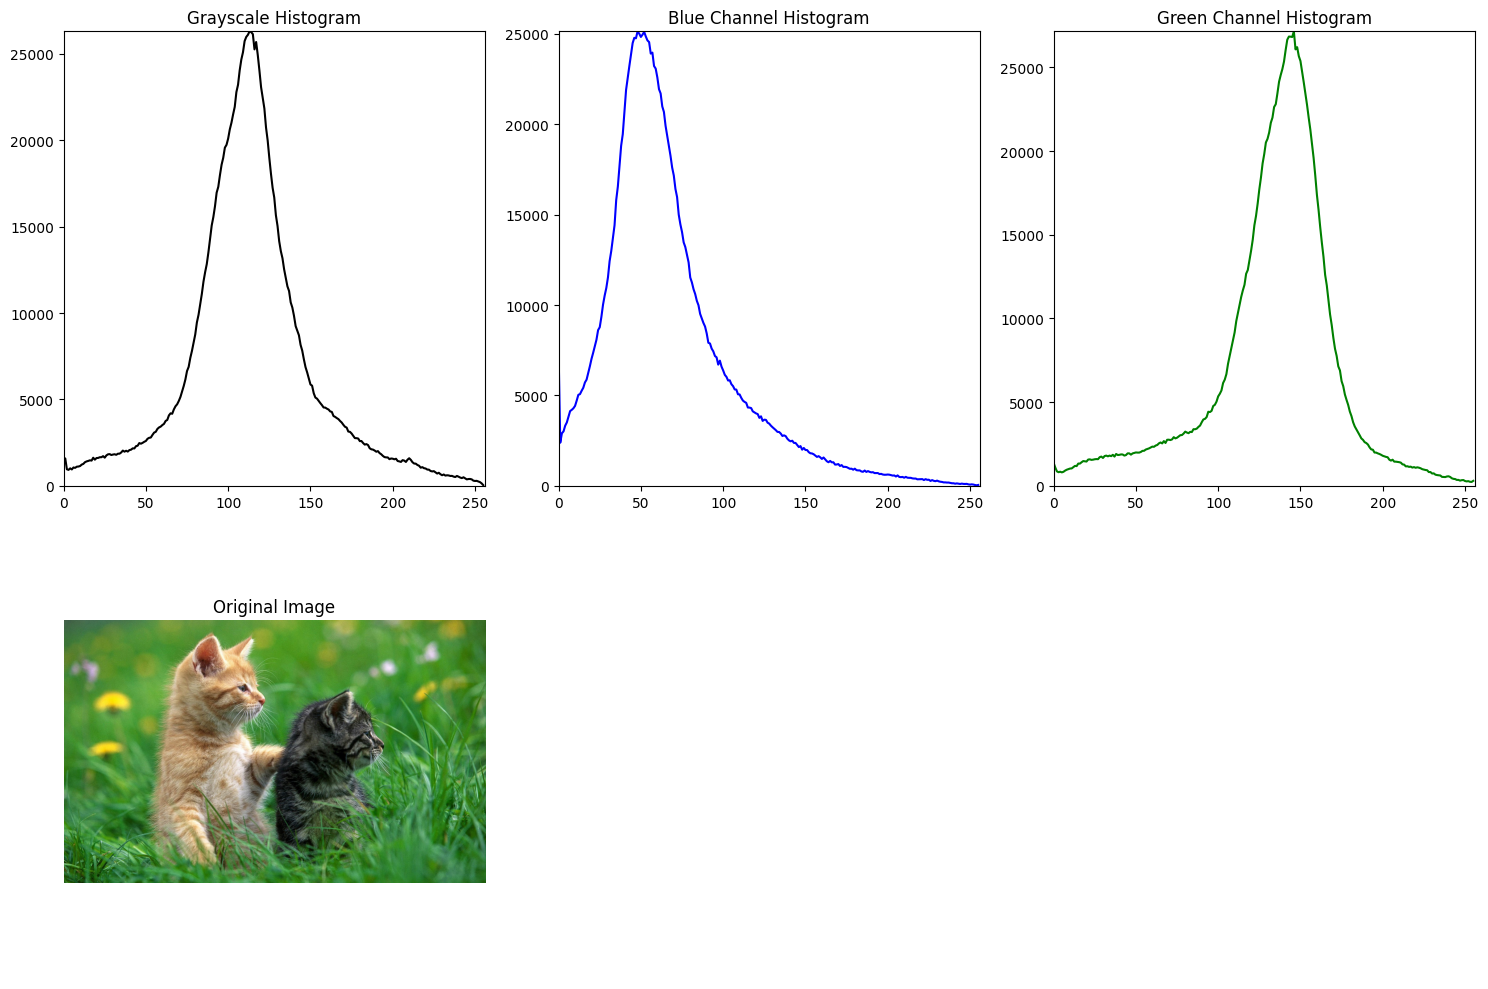

In [4]:
print("Task 11")
# Step 1: Load the image
image = cv2.imread('cats.jpg') 

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 2: Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Calculate histograms
    # Grayscale histogram
    grayscale_hist = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])

    # Blue and Green channel histograms
    blue_channel_hist = cv2.calcHist([image], [0], None, [256], [0, 256])  # Blue channel
    green_channel_hist = cv2.calcHist([image], [1], None, [256], [0, 256])  # Green channel

    # Step 4: Set up Matplotlib figure with 2x3 grid of subplots
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Plot Grayscale histogram
    axs[0, 0].plot(grayscale_hist, color='black')
    axs[0, 0].set_title('Grayscale Histogram')
    axs[0, 0].set_xlim([0, 256])
    axs[0, 0].set_ylim([0, max(grayscale_hist)])
    
    # Plot Blue channel histogram
    axs[0, 1].plot(blue_channel_hist, color='blue')
    axs[0, 1].set_title('Blue Channel Histogram')
    axs[0, 1].set_xlim([0, 256])
    axs[0, 1].set_ylim([0, max(blue_channel_hist)])

    # Plot Green channel histogram
    axs[0, 2].plot(green_channel_hist, color='green')
    axs[0, 2].set_title('Green Channel Histogram')
    axs[0, 2].set_xlim([0, 256])
    axs[0, 2].set_ylim([0, max(green_channel_hist)])

    # Display the original image in the bottom-left subplot
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    axs[1, 0].imshow(image_rgb)
    axs[1, 0].set_title('Original Image')
    axs[1, 0].axis('off')

    # Turn off the axis for the other unused subplots
    axs[1, 1].axis('off')
    axs[1, 2].axis('off')

    # Step 5: Adjust the layout to display everything correctly
    plt.tight_layout()
    plt.show()


# Task 12 Linear Spatial Filtering

**Description:**  
Linear spatial filtering is a technique used in image processing to modify an image based on the linear combination of pixel values in its neighborhood. This process involves using a filter (or kernel) that slides over the image to perform operations such as smoothing, sharpening, and edge detection.

---

### **Key Concepts:**

1. **Filter (Kernel):**  
   - A small matrix (e.g., 3x3, 5x5) used to process the image. Each element in the kernel represents a weight that modifies the corresponding pixel in the image.

2. **Convolution:**  
   - The core operation in linear spatial filtering. It involves overlaying the filter on the image, multiplying the filter values with the corresponding pixel values, summing the results, and replacing the central pixel with this sum.

3. **Filtering Operations:**  
   - **Smoothing (Blurring):**  
     Reduces noise and detail by averaging pixel values, which results in a softening effect. Common kernels include the average filter and Gaussian filter.
   - **Sharpening:**  
     Enhances edges and fine details by emphasizing differences between pixel values. Common kernels include the Laplacian filter and the unsharp mask.
   - **Edge Detection:**  
     Highlights the boundaries of objects within an image. Filters like the Sobel and Prewitt operators are commonly used for this purpose.

---

Task 12


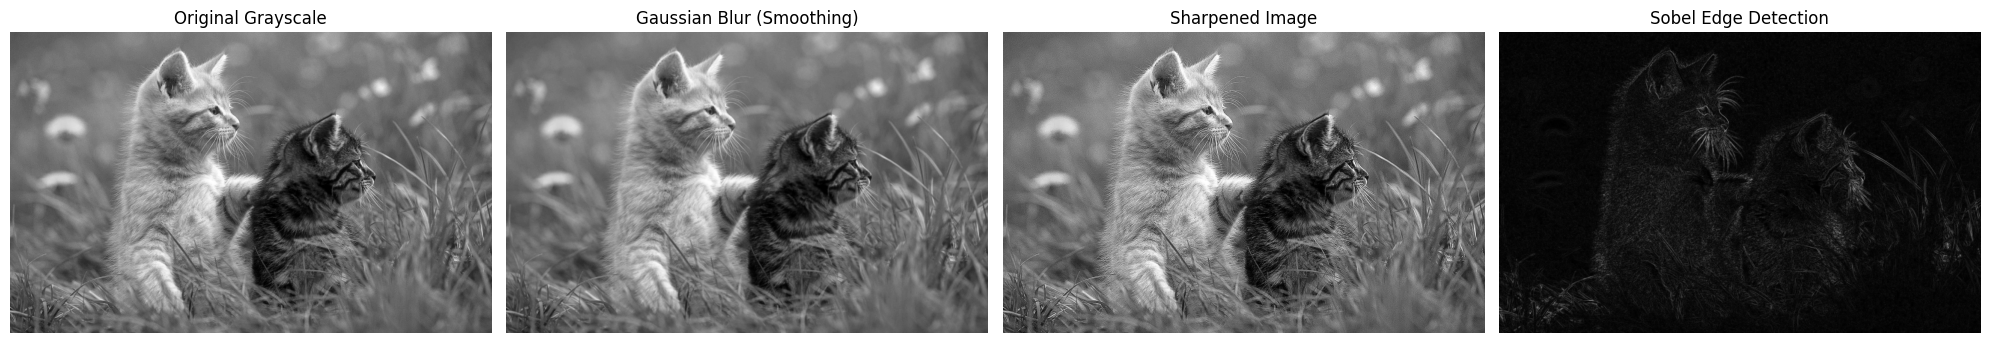

In [7]:
print("Task 12")

image = cv2.imread('cats.jpg')  

if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Key concept: Smoothing (Blurring) - Apply Gaussian Blur (Smoothing Filter)
    blur_kernel = (5, 5)
    blurred_image = cv2.GaussianBlur(gray_image, blur_kernel, 0)

    # Key concept: Sharpening - Use a sharpening kernel
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpened_image = cv2.filter2D(gray_image, -1, sharpen_kernel)

    # Key concept: Edge Detection - Apply Sobel filter
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Detect edges along the X-axis
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Detect edges along the Y-axis
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # Display the images side by side
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Display original grayscale image
    axs[0].imshow(gray_image, cmap='gray')
    axs[0].set_title('Original Grayscale')
    axs[0].axis('off')

    # Display blurred image
    axs[1].imshow(blurred_image, cmap='gray')
    axs[1].set_title('Gaussian Blur (Smoothing)')
    axs[1].axis('off')

    # Display sharpened image
    axs[2].imshow(sharpened_image, cmap='gray')
    axs[2].set_title('Sharpened Image')
    axs[2].axis('off')

    # Display Sobel edge detection result
    axs[3].imshow(sobel_combined, cmap='gray')
    axs[3].set_title('Sobel Edge Detection')
    axs[3].axis('off')

    # Show the result
    plt.tight_layout()
    plt.show()